## Glass Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass.csv


In [3]:
glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass.shape

(214, 10)

In [6]:
glass['RI'].value_counts()

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64

In [7]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [9]:
glass['Ba'].value_counts()

0.00    176
0.64      2
1.57      2
0.09      2
1.59      2
0.11      2
3.15      1
0.81      1
1.64      1
1.06      1
0.54      1
2.88      1
1.38      1
1.55      1
0.67      1
1.71      1
0.56      1
0.63      1
0.53      1
0.66      1
0.61      1
0.27      1
0.69      1
0.40      1
0.14      1
0.76      1
1.68      1
1.63      1
1.19      1
0.24      1
2.20      1
0.15      1
0.06      1
1.67      1
Name: Ba, dtype: int64

In [11]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [12]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [13]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [17]:
glass = glass.drop_duplicates()

In [18]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


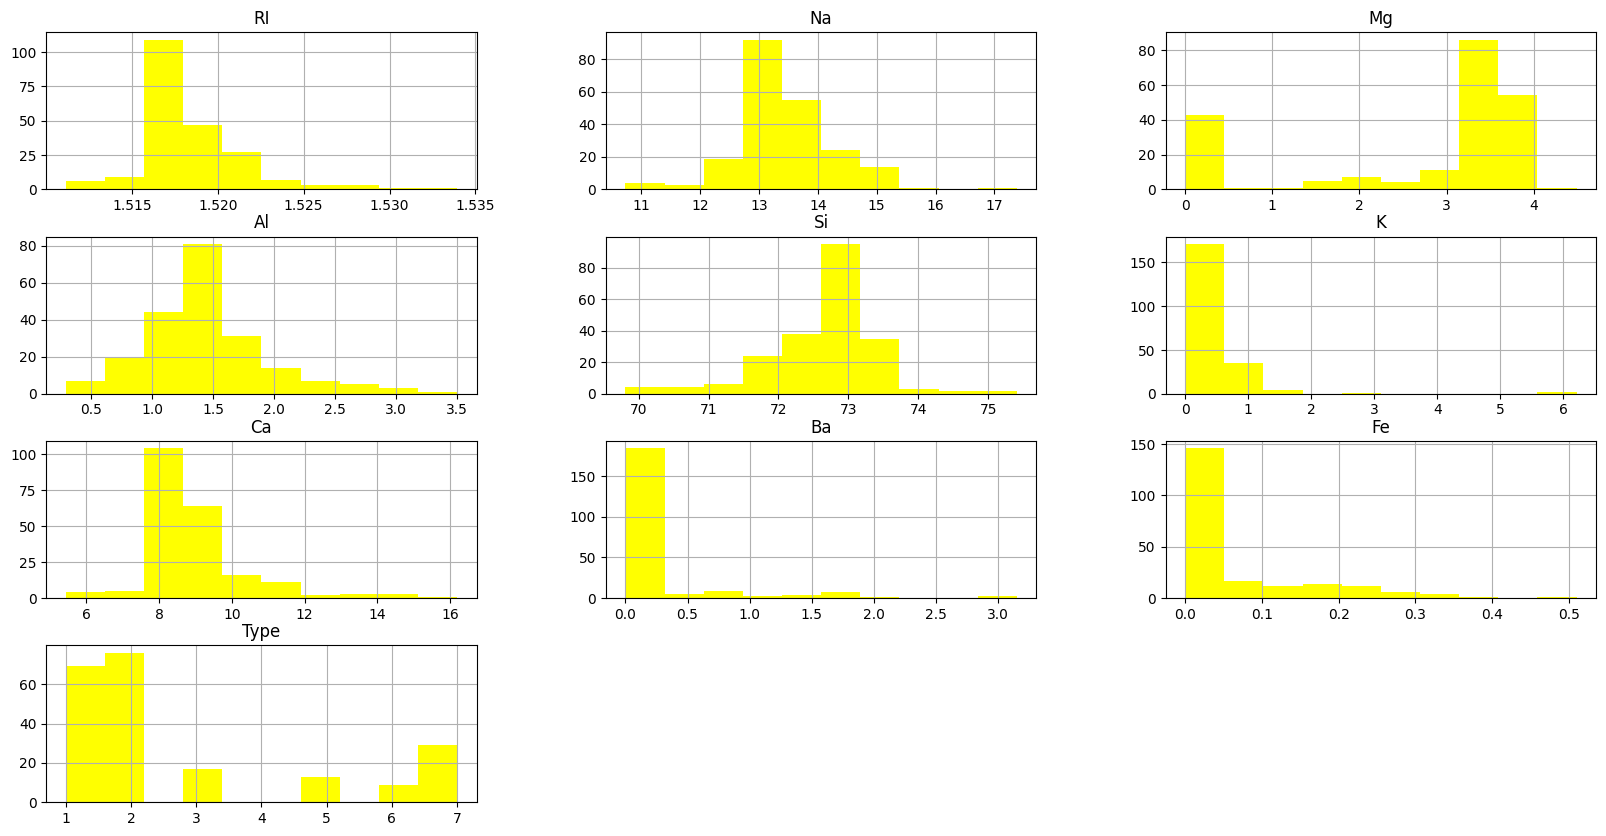

In [20]:
glass.hist(figsize=(20,10),color='yellow')
plt.show()

<Axes: >

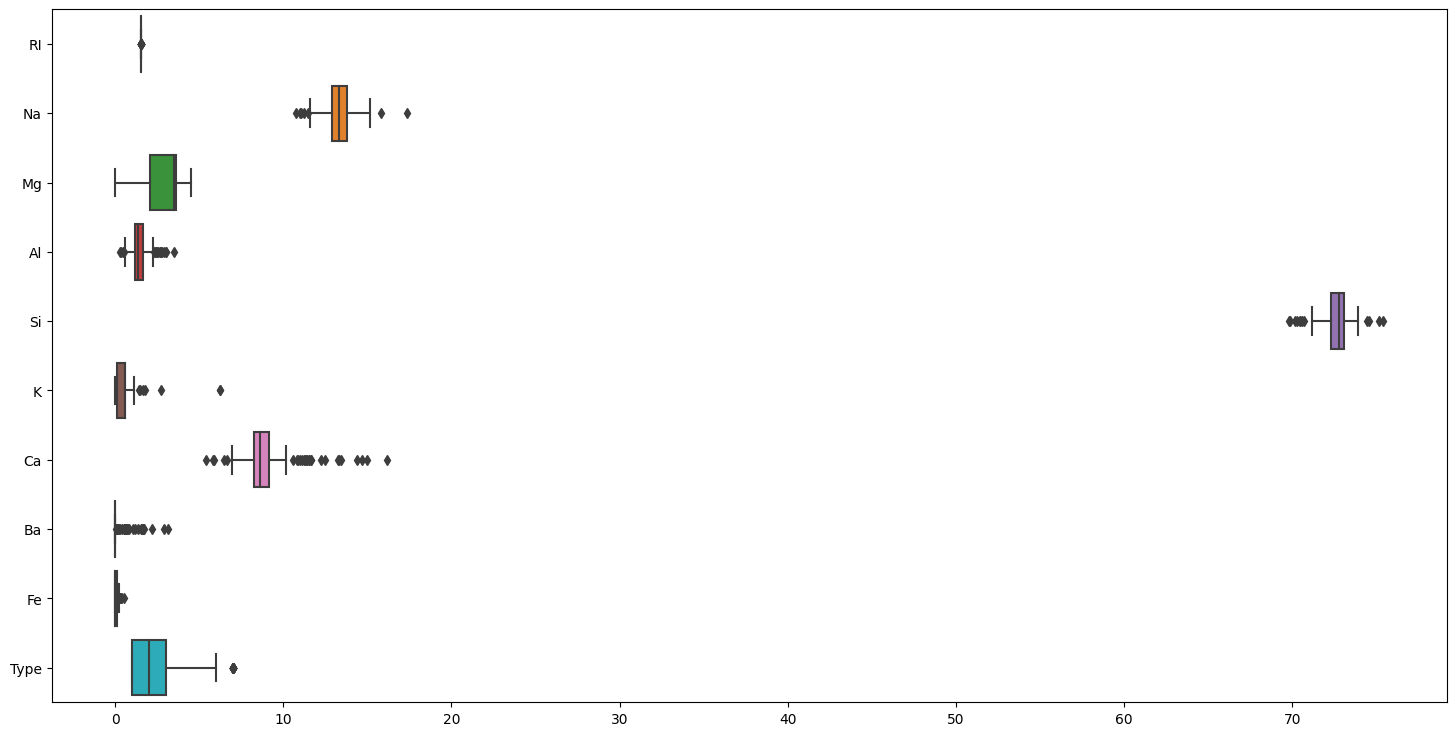

In [21]:
plt.figure(figsize=(18,9))
sns.boxplot(glass, orient='h')

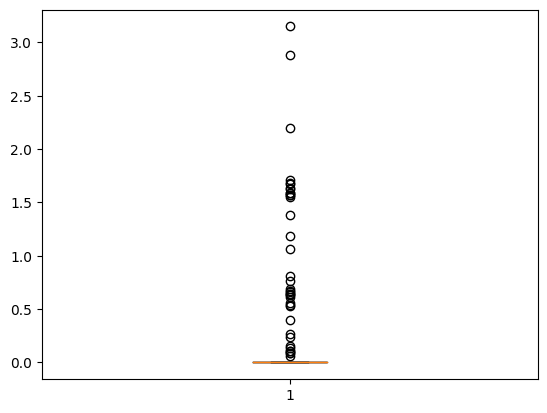

In [23]:
plt.boxplot(glass['Ba'])
plt.show()

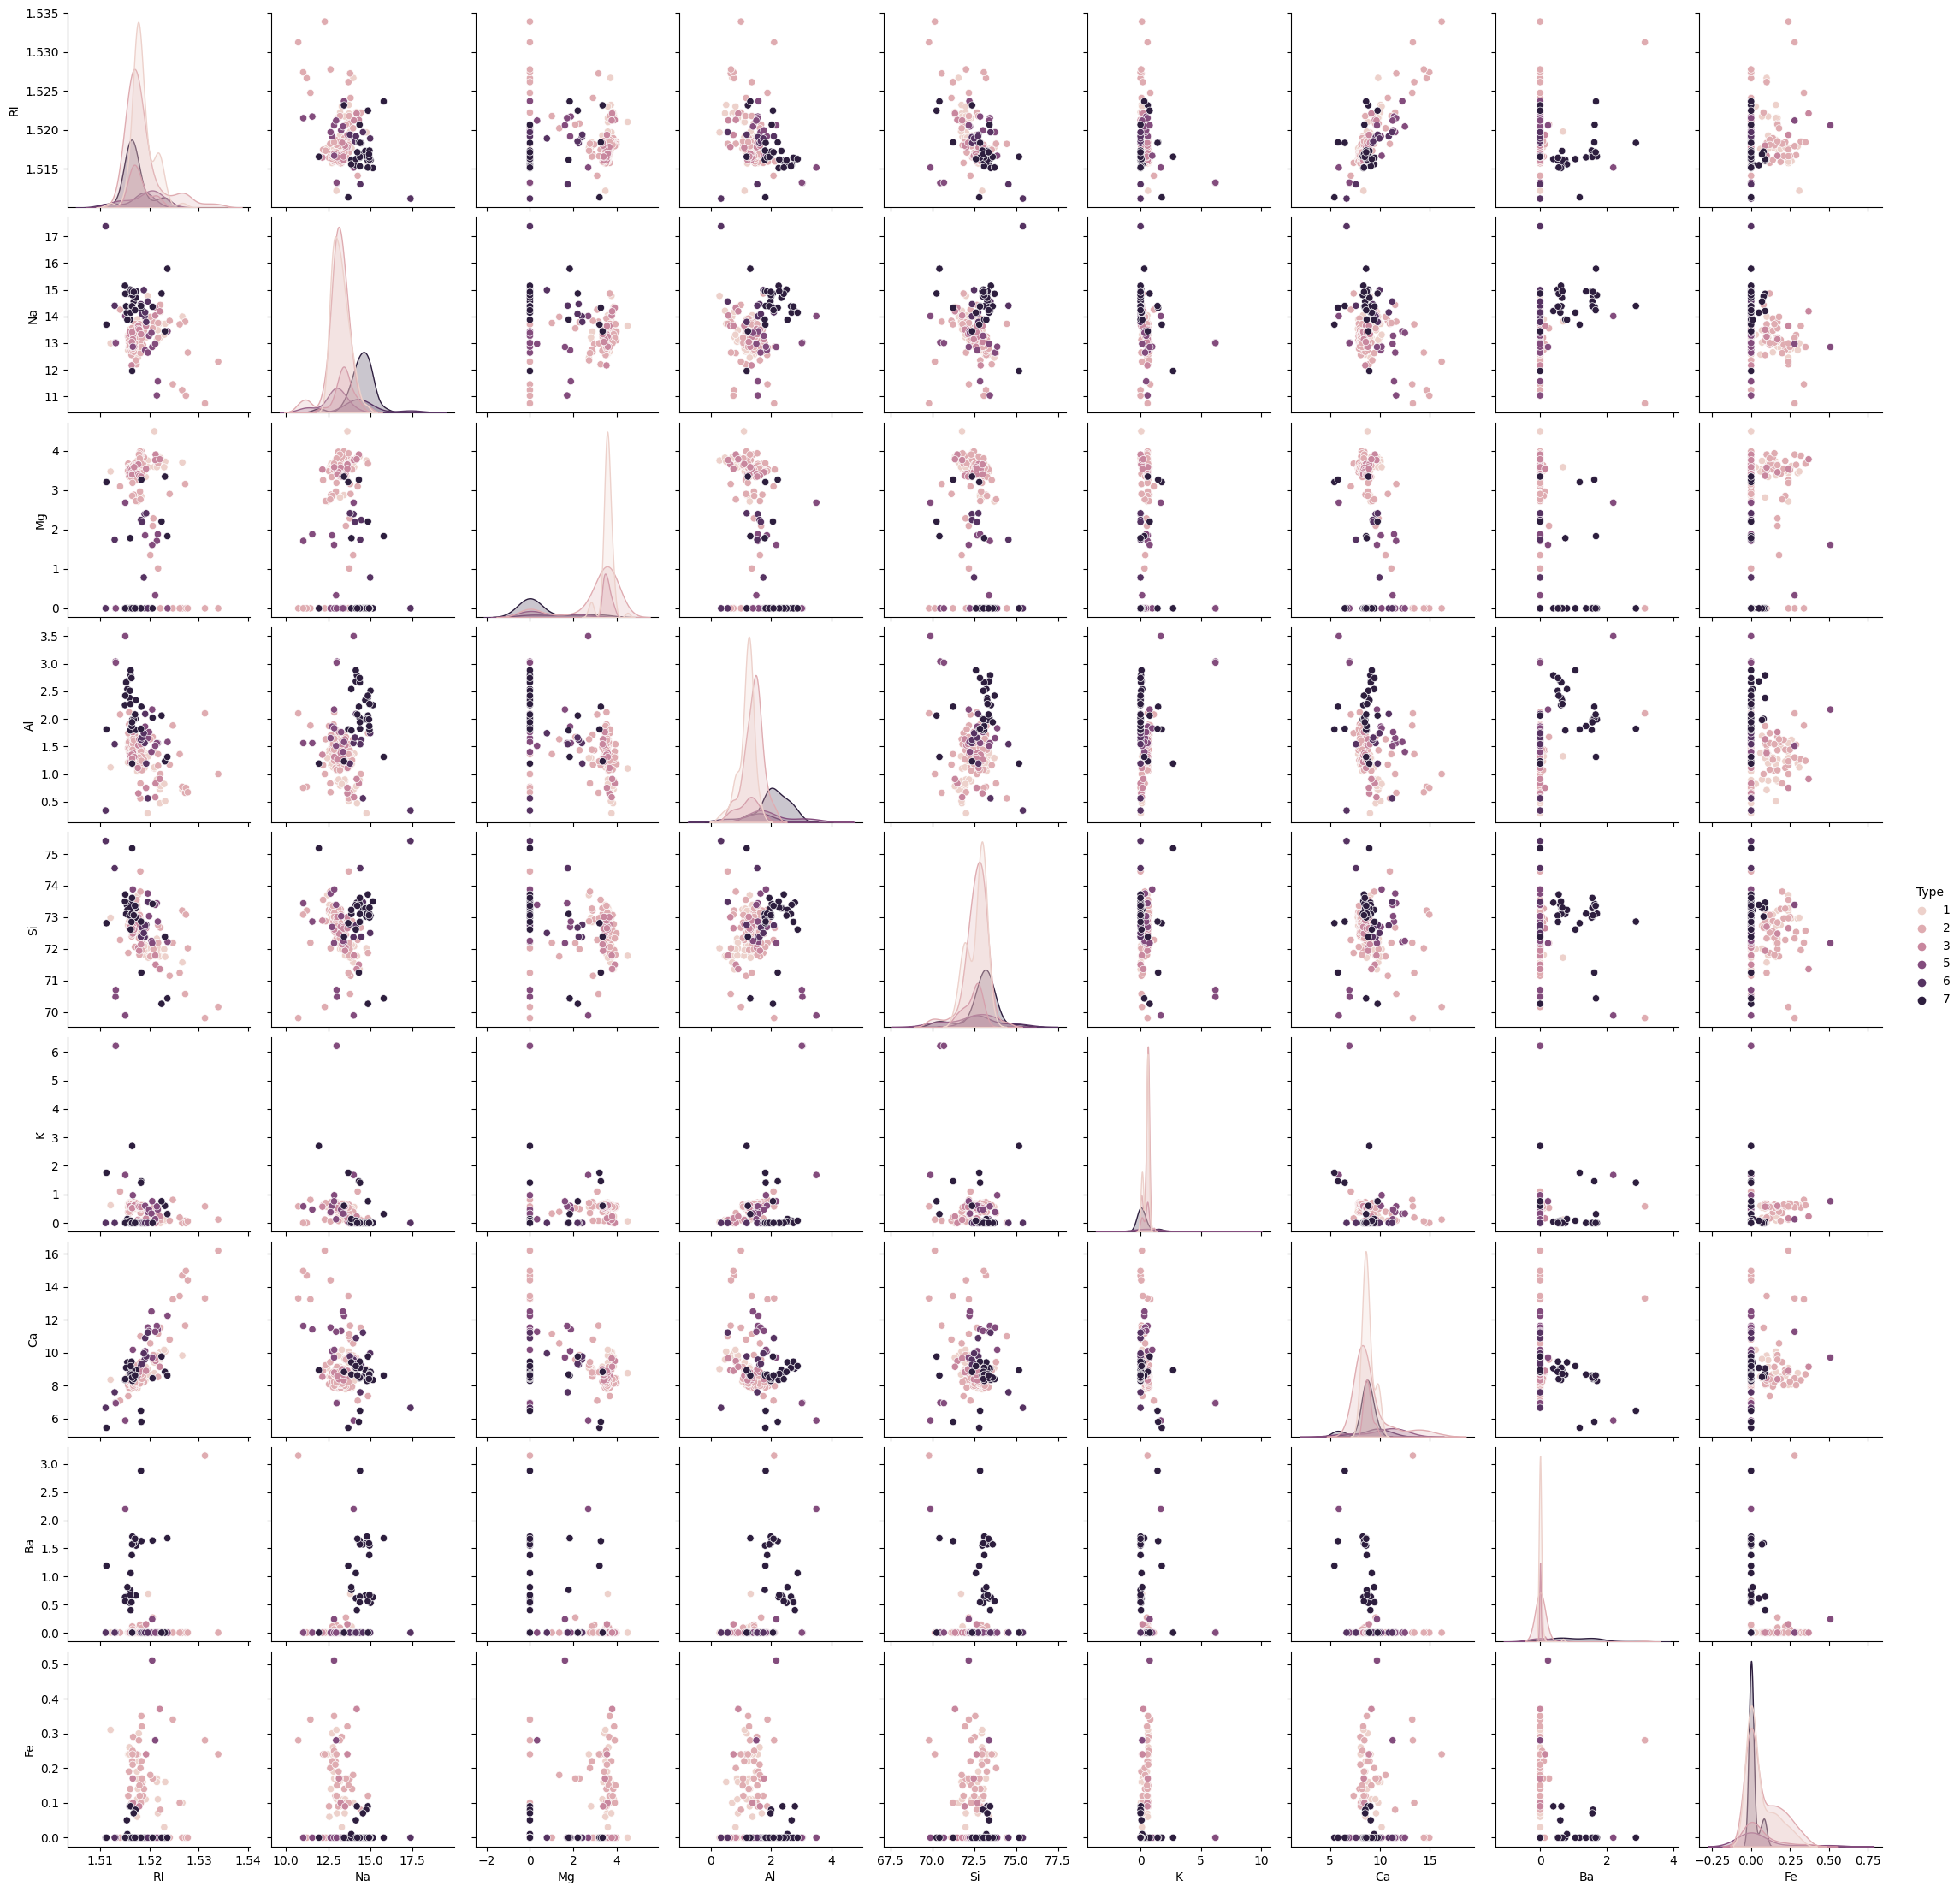

In [24]:
sns.pairplot(glass, hue='Type')
plt.show()

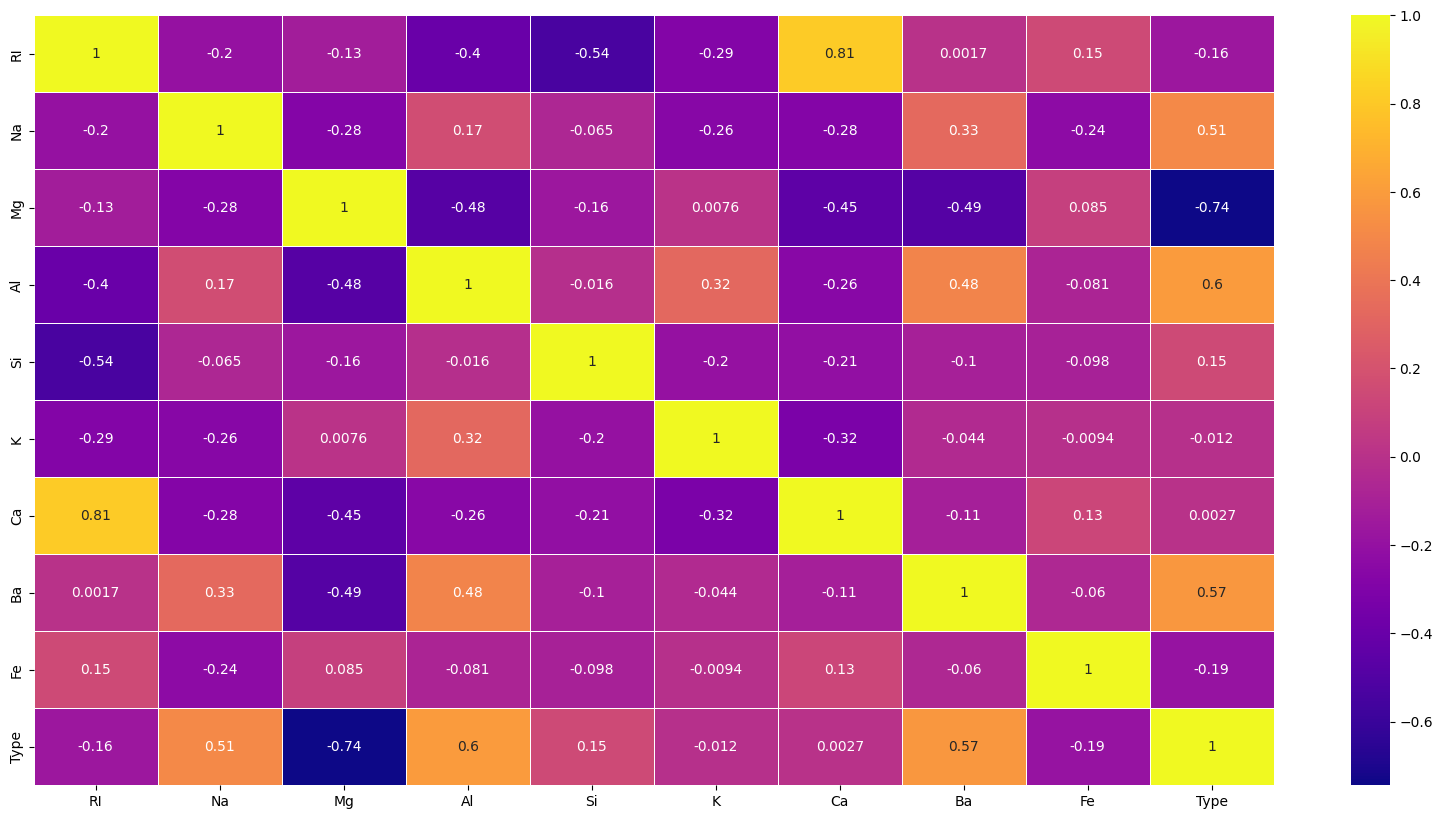

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(glass.corr(), annot=True, cmap='plasma', linewidths=0.5)
plt.show()

In [28]:
X = glass.iloc[:,:-1]
y = glass.iloc[:,-1]

In [31]:
X.shape, y.shape

((213, 9), (213,))

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

kfold = KFold(n_splits=15)

model = KNeighborsClassifier(n_neighbors=10)
results = cross_val_score(model, X, y, cv=kfold)

In [61]:
results

array([0.4       , 0.86666667, 1.        , 0.64285714, 1.        ,
       0.85714286, 0.28571429, 0.21428571, 0.57142857, 0.64285714,
       0.        , 0.        , 0.07142857, 0.64285714, 0.92857143])

In [62]:
print(results.mean())

0.5415873015873015


checking which hyper parameter is good for KNN model

In [63]:
from sklearn.model_selection import GridSearchCV

n_neighbors = np.array(range(1,45))
param_grid = dict(n_neighbors = n_neighbors)

In [64]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44])}

In [67]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44])})

In [68]:
print(grid.best_score_)
print(grid.best_params_)

0.64828349944629
{'n_neighbors': 1}


In [69]:
k_range = range(1,45)
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
  k_scores.append(scores.mean())

pd.Series(k_scores).sort_values(ascending=False)

0     0.638961
5     0.638961
2     0.633983
21    0.630087
25    0.629870
4     0.629221
24    0.625758
23    0.625541
19    0.625325
27    0.625108
3     0.624459
22    0.620779
26    0.620563
28    0.620346
29    0.620346
6     0.619913
15    0.616017
18    0.615801
20    0.615801
17    0.615584
16    0.611039
7     0.611039
30    0.610823
11    0.606710
9     0.606494
14    0.606494
13    0.606494
32    0.606277
31    0.606277
12    0.601948
33    0.601515
10    0.597186
1     0.596753
34    0.596753
43    0.591991
35    0.591991
42    0.591991
36    0.591775
8     0.587662
38    0.587229
37    0.582684
39    0.582684
40    0.577922
41    0.573160
dtype: float64

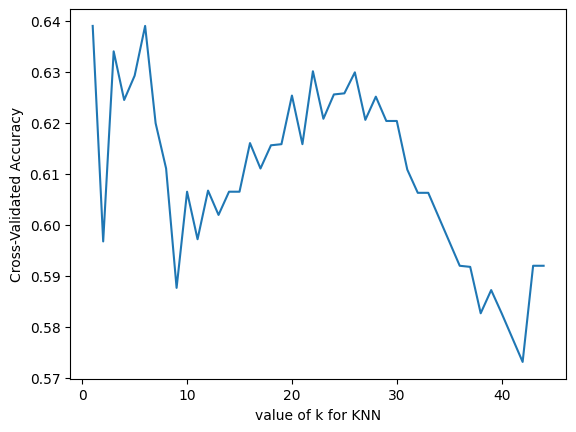

In [70]:
%matplotlib inline

k_range = range(1,45)
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, y, cv = 10)
  k_scores.append(scores.mean())

plt.plot(k_range, k_scores)

plt.xlabel('value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Building Good model

In [86]:
model_new = KNeighborsClassifier(n_neighbors=5)
model_new.fit(X,y)

KNeighborsClassifier()

In [87]:
accuracy = cross_val_score(model_new, X, y, cv=10)
accuracy

array([0.54545455, 0.5       , 0.81818182, 0.57142857, 0.66666667,
       0.71428571, 0.76190476, 0.33333333, 0.66666667, 0.71428571])

In [88]:
print(accuracy.mean())

0.6292207792207792


## Zoo Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Zoo.csv to Zoo (1).csv


In [3]:
zoo = pd.read_csv('Zoo.csv')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
zoo.shape

(101, 18)

In [5]:
zoo['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [6]:
zoo['hair'].value_counts()

0    58
1    43
Name: hair, dtype: int64

In [7]:
zoo['feathers'].value_counts()

0    81
1    20
Name: feathers, dtype: int64

In [8]:
zoo['eggs'].value_counts()

1    59
0    42
Name: eggs, dtype: int64

In [9]:
zoo['legs'].value_counts()

4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64

In [10]:
zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [11]:
zoo['venomous'].value_counts()

0    93
1     8
Name: venomous, dtype: int64

In [12]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [13]:
zoo[zoo.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [14]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [15]:
zoo[zoo['animal name']=='frog']

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


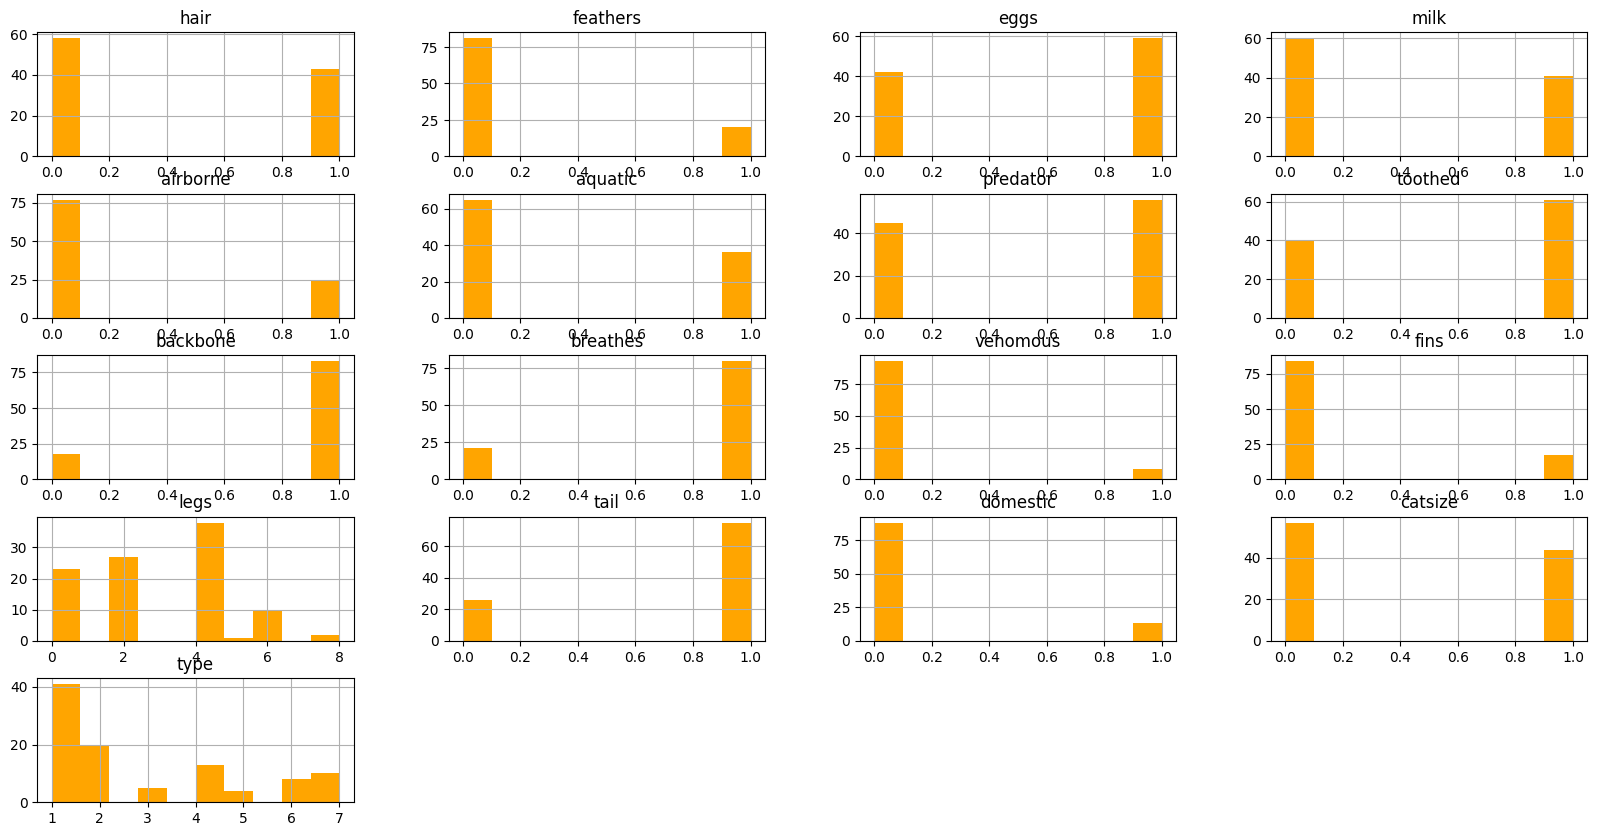

In [16]:
zoo.hist(figsize = (20,10), color='orange')
plt.show()

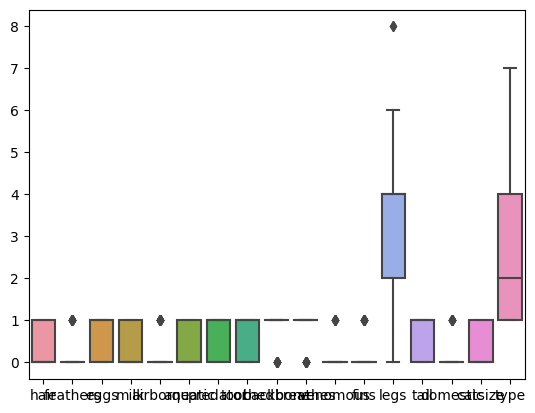

In [17]:
sns.boxplot(zoo, orient='v')
plt.show()

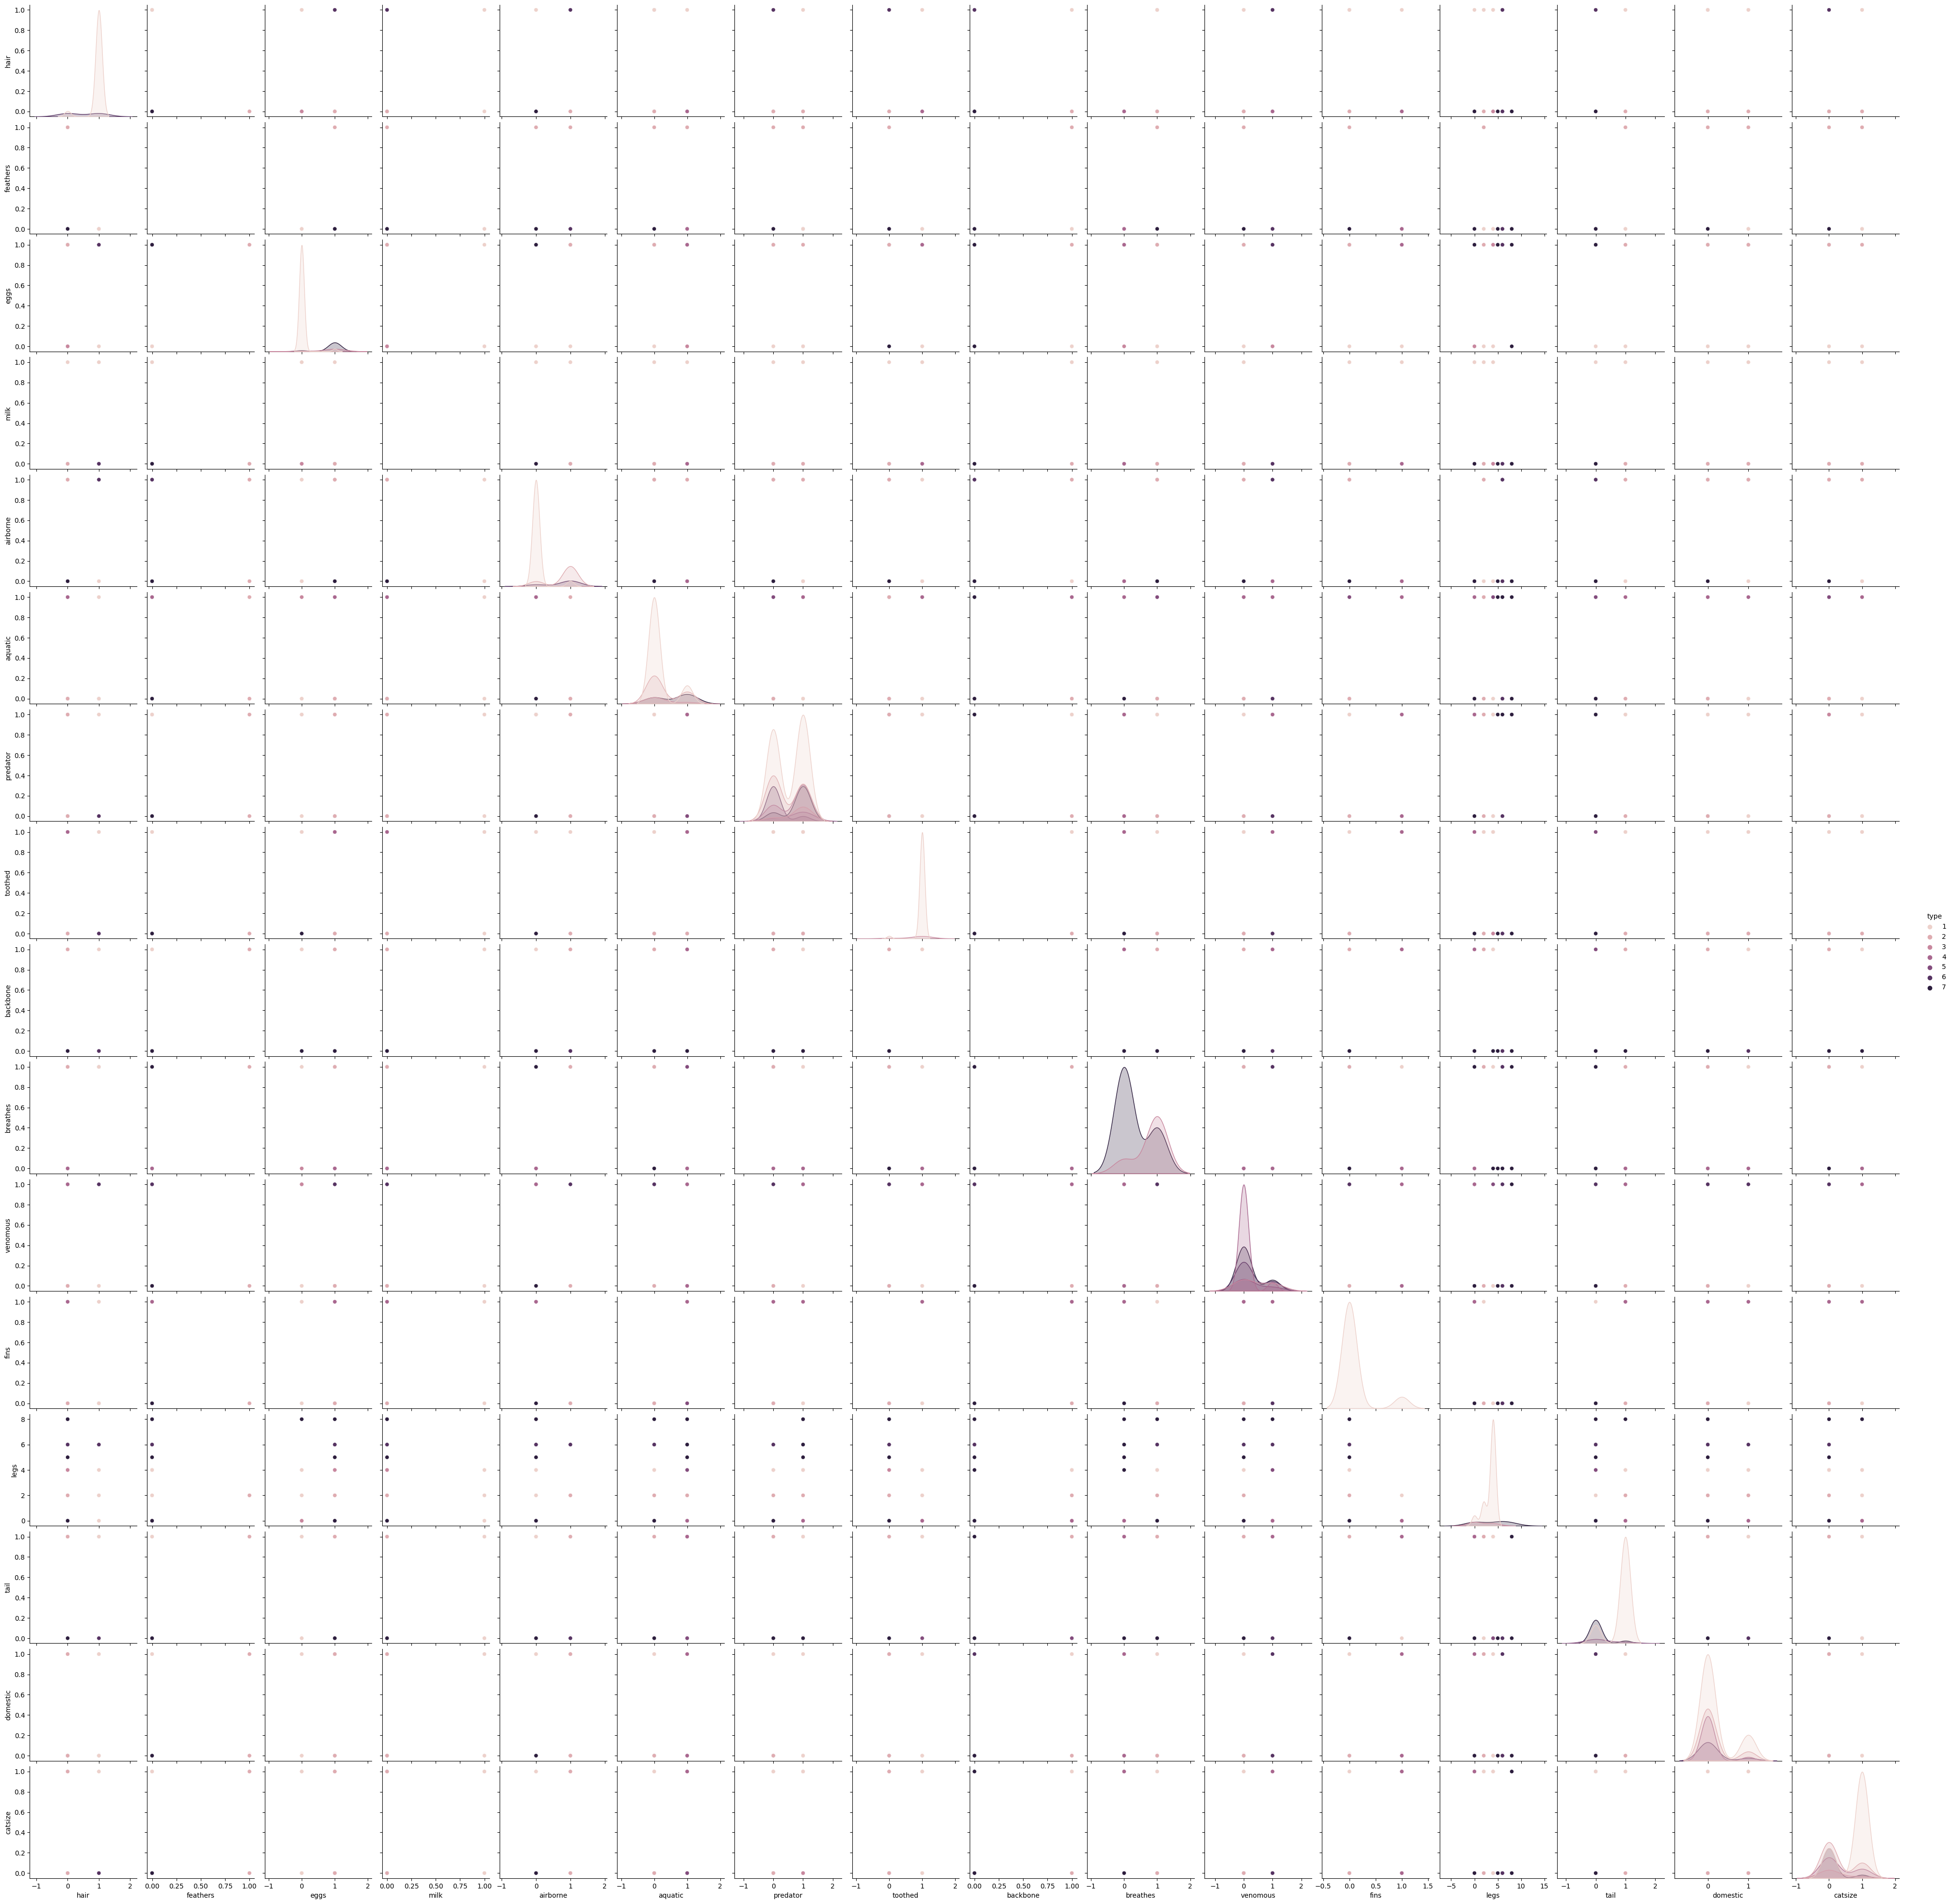

In [18]:
sns.pairplot(zoo,hue='type')
plt.show()

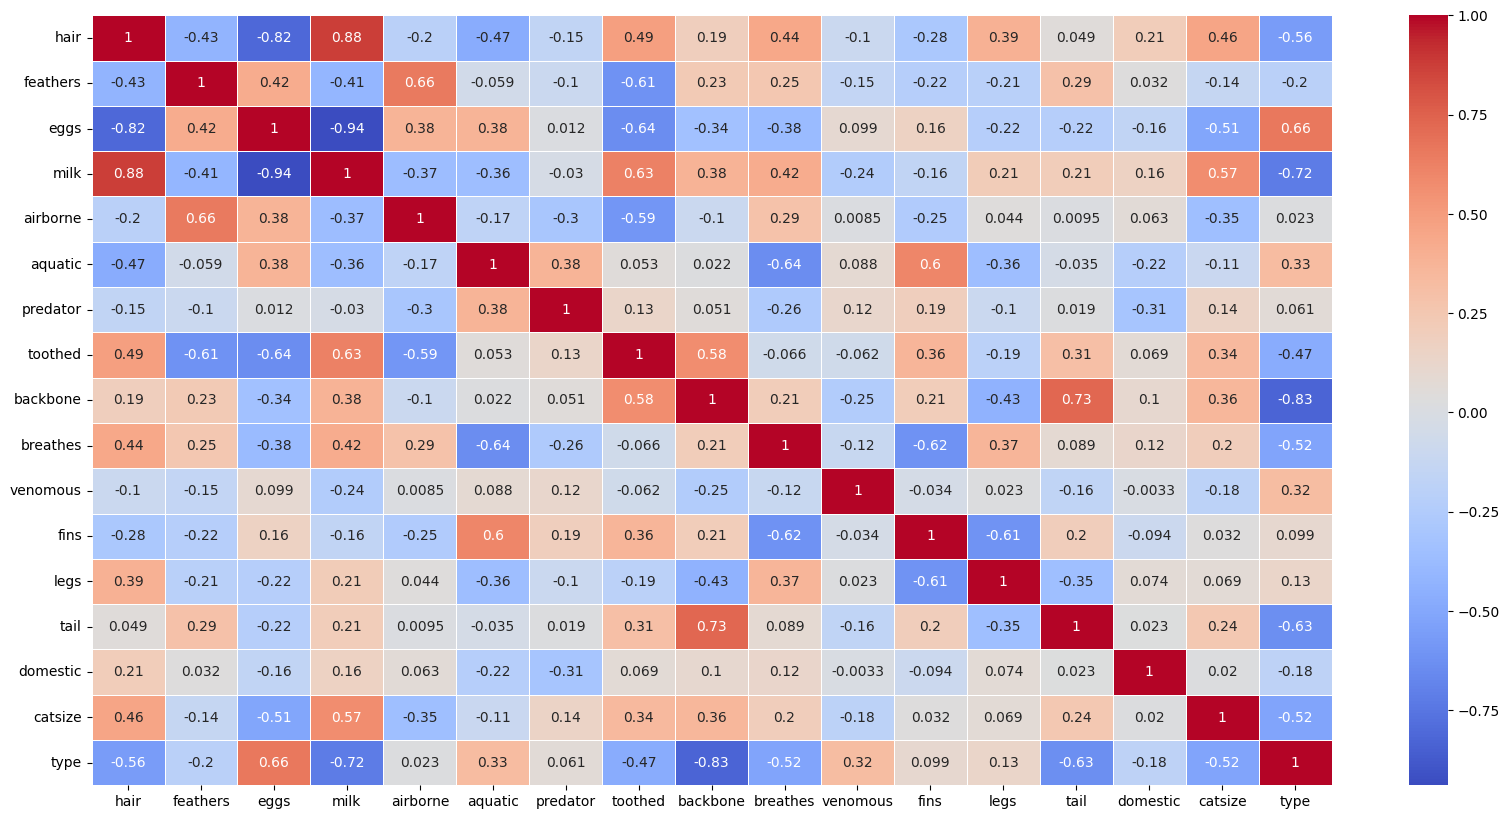

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(zoo.corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.show()

In [30]:
X = zoo.iloc[:,:-1]
y = zoo.iloc[:,-1]
X = X.drop(columns=['animal name'],axis=1)

In [31]:
X.shape, y.shape

((101, 16), (101,))

In [32]:
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

kfold = KFold(n_splits=15)

model = KNeighborsClassifier(n_neighbors=10)
results = cross_val_score(model, X, y, cv=kfold)

In [46]:
results

array([1.        , 0.85714286, 0.57142857, 0.71428571, 1.        ,
       1.        , 0.85714286, 0.71428571, 0.85714286, 0.85714286,
       0.57142857, 0.5       , 0.83333333, 0.5       , 0.83333333])

In [47]:
print(results.mean())

0.7777777777777778


checking which hyper parameter is good for KNN model

In [48]:
from sklearn.model_selection import GridSearchCV

n_neighbors = np.array(range(1,60))
param_grid = dict(n_neighbors = n_neighbors)

In [49]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59])}

In [50]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59])})

In [51]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


In [52]:
k_range = range(1,45)
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
  k_scores.append(scores.mean())

pd.Series(k_scores).sort_values(ascending=False)

0     0.980000
2     0.950000
1     0.940000
3     0.920000
4     0.880909
5     0.870909
6     0.841818
7     0.811818
15    0.781818
20    0.781818
19    0.781818
18    0.781818
17    0.781818
16    0.781818
11    0.781818
14    0.781818
13    0.781818
12    0.781818
10    0.781818
9     0.781818
8     0.781818
21    0.781818
22    0.771818
23    0.741818
24    0.721818
25    0.702727
26    0.702727
27    0.702727
28    0.702727
29    0.702727
30    0.702727
31    0.692727
32    0.643636
34    0.593636
33    0.593636
35    0.573636
36    0.573636
37    0.573636
38    0.573636
39    0.573636
40    0.573636
41    0.573636
42    0.573636
43    0.563636
dtype: float64

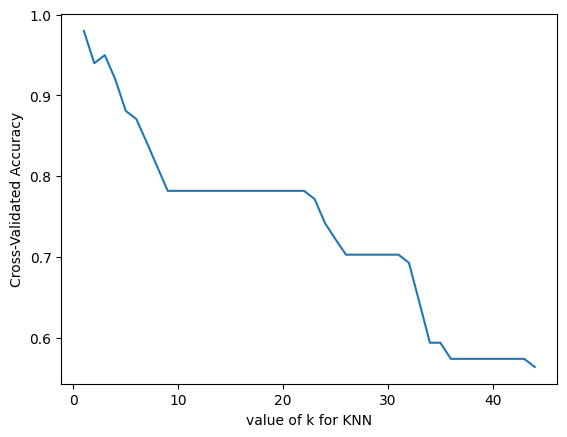

In [53]:
%matplotlib inline

k_range = range(1,45)
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, y, cv = 10)
  k_scores.append(scores.mean())

plt.plot(k_range, k_scores)

plt.xlabel('value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Building Good model

In [54]:
model_new = KNeighborsClassifier(n_neighbors=3)
model_new.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [55]:
accuracy = cross_val_score(model_new, X, y, cv=10)
accuracy

array([1. , 1. , 1. , 1. , 1. , 0.9, 0.9, 0.9, 0.9, 0.9])

In [56]:
print(accuracy.mean())

0.95
